In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
record_count = 1
set_count = 1
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilma
Processing Record 2 of Set 1 | wakkanai
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | san cristobal
Processing Record 6 of Set 1 | san quintin
Processing Record 7 of Set 1 | eureka
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | saleaula
City not found. Skipping...
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | kondinskoye
Processing Record 18 of Set 1 | msanga
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | grants
Processing Record 22 of Set 1 | namibe
Processing Re

Processing Record 40 of Set 4 | sao jose da coroa grande
Processing Record 41 of Set 4 | haverfordwest
Processing Record 42 of Set 4 | husavik
Processing Record 43 of Set 4 | manokwari
Processing Record 44 of Set 4 | mildura
Processing Record 45 of Set 4 | bubaque
Processing Record 46 of Set 4 | sitka
Processing Record 47 of Set 4 | asau
Processing Record 48 of Set 4 | beringovskiy
Processing Record 49 of Set 4 | bengkulu
Processing Record 50 of Set 4 | henties bay
Processing Record 1 of Set 5 | guarapari
Processing Record 2 of Set 5 | kaeo
Processing Record 3 of Set 5 | havre-saint-pierre
Processing Record 4 of Set 5 | ixtapa
Processing Record 5 of Set 5 | micheweni
Processing Record 6 of Set 5 | kavaratti
Processing Record 7 of Set 5 | byron bay
Processing Record 8 of Set 5 | castelo do piaui
Processing Record 9 of Set 5 | vila franca do campo
Processing Record 10 of Set 5 | gat
Processing Record 11 of Set 5 | alamosa
Processing Record 12 of Set 5 | port-gentil
Processing Record 13 o

Processing Record 30 of Set 8 | broome
Processing Record 31 of Set 8 | thinadhoo
Processing Record 32 of Set 8 | burnie
Processing Record 33 of Set 8 | ayan
Processing Record 34 of Set 8 | nioro
Processing Record 35 of Set 8 | cumbum
Processing Record 36 of Set 8 | wuhan
Processing Record 37 of Set 8 | llangefni
Processing Record 38 of Set 8 | kruisfontein
Processing Record 39 of Set 8 | marcona
City not found. Skipping...
Processing Record 40 of Set 8 | kismayo
Processing Record 41 of Set 8 | tlahualilo
City not found. Skipping...
Processing Record 42 of Set 8 | banda aceh
Processing Record 43 of Set 8 | vestmanna
Processing Record 44 of Set 8 | gazanjyk
Processing Record 45 of Set 8 | namatanai
Processing Record 46 of Set 8 | luganville
Processing Record 47 of Set 8 | pimentel
Processing Record 48 of Set 8 | severnyy
Processing Record 49 of Set 8 | udachnyy
Processing Record 50 of Set 8 | copiapo
Processing Record 1 of Set 9 | samarai
Processing Record 2 of Set 9 | tsihombe
City not 

Processing Record 18 of Set 12 | krasnoarmeysk
Processing Record 19 of Set 12 | yerbogachen
Processing Record 20 of Set 12 | lakselv
Processing Record 21 of Set 12 | zhanatas
City not found. Skipping...
Processing Record 22 of Set 12 | oum hadjer
Processing Record 23 of Set 12 | barra do garcas
Processing Record 24 of Set 12 | barawe
City not found. Skipping...
Processing Record 25 of Set 12 | gigant
Processing Record 26 of Set 12 | aksarka
Processing Record 27 of Set 12 | meyungs
City not found. Skipping...
Processing Record 28 of Set 12 | agadez
Processing Record 29 of Set 12 | jiroft
City not found. Skipping...
Processing Record 30 of Set 12 | ust-nera
Processing Record 31 of Set 12 | pyay
Processing Record 32 of Set 12 | poltavka
Processing Record 33 of Set 12 | boddam
Processing Record 34 of Set 12 | renqiu
Processing Record 35 of Set 12 | osoyoos
Processing Record 36 of Set 12 | honolulu
Processing Record 37 of Set 12 | sao gabriel
Processing Record 38 of Set 12 | chiredzi
Proces

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bilma,NE,2021-10-24 14:54:53,18.6853,12.9164,97.34,8,0,6.24
1,Wakkanai,JP,2021-10-24 14:57:30,45.4094,141.6739,52.07,64,0,5.84
2,Butaritari,KI,2021-10-24 14:57:30,3.0707,172.7902,80.13,74,11,3.78
3,Hithadhoo,MV,2021-10-24 14:57:30,-0.6000,73.0833,83.43,72,56,13.76
4,San Cristobal,VE,2021-10-24 14:57:31,7.7669,-72.2250,73.58,53,96,6.33
5,San Quintin,MX,2021-10-24 14:57:31,30.4833,-115.9500,61.68,79,22,8.37
6,Eureka,US,2021-10-24 14:57:32,40.8021,-124.1637,60.19,90,100,7.00
7,Punta Arenas,CL,2021-10-24 14:52:46,-53.1500,-70.9167,44.71,76,75,23.02
8,Georgetown,MY,2021-10-24 14:57:32,5.4112,100.3354,79.95,93,40,3.00
9,Yellowknife,CA,2021-10-24 14:57:32,62.4560,-114.3525,42.42,85,75,19.57


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1635089380.1785147

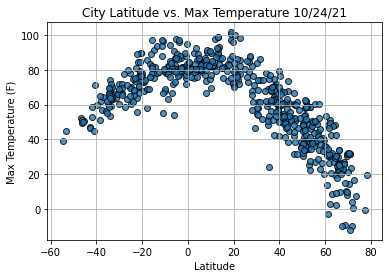

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

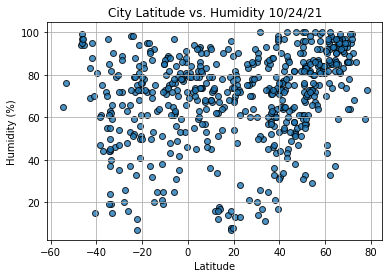

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

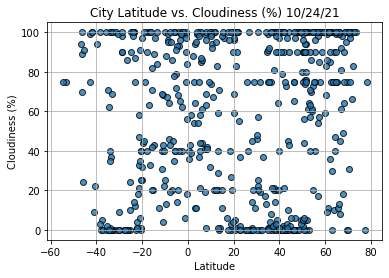

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

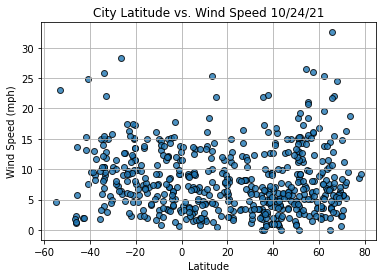

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()